## Step 1: Analysis of Current Light Rail Systems

#### I had to scrape the Wikipedia page which contained a chart of light rail tranist systems in the United States. This table required extensive cleaning and formating due to the use of hyperlinks, quotation and citations, as well as bi-lateral rows for the same system due to different lines carrying different names. Furthermore, some columns contained "," while others did not. The existence of the "," in the numerical strings caused formatting issues. Finally, the population density information was provided by the US Census Bureau and was not contained in the Wikipedia list on US Light Rail Transit Systems. 

#### Therefore, I decided to wrangle and clean the data outside f this notebook environment.  I saved the formatted documents in CSV UTF-8 and uploaded that documentation to the IBM Cloud by structuring a connection between my local drive and the IBM Notebook. I loaded the proper libraries for importing these documents from the IBM cloud.

Data Location: Wikipedia North America ligh-rail transit ridership: https://en.wikipedia.org/wiki/List_of_North_American_light_rail_systems_by_ridership

In [69]:
# The code was removed by Watson Studio for sharing.

,System Name,City,Annual Ridership,Daily Ridership,AVG Daily Bordings Per Mile,Pop Density,Job Density
0,MBTA,Boston,67029600,204000,8712,14345,12742
1,Muni Metro,San Francisco,51482600,162500,4602,18838,53375
2,Link,Seattle,24155900,74400,3456,8642,35112
3,METRO Light Rail,Minneapolis,23811200,71900,3344,7820,17631
4,Hudson Light Rail,Jersey City,16691558,54434,3202,16736,138541
5,Newark Light Rail,Newark,5356687,18505,2985,11458,138541
6,Buffalo Metro Rail,Buffalo,4560600,16900,2734,6436,4710
7,METRORail,Houston,18808000,61100,2427,3660,12556
8,Metro Rail,Los Angeles,67921600,219900,2403,8483,17386
9,Valley Metro Rail,Phoenix,16269000,48900,2240,3207,6984


In [70]:
#what is the average number of boardings per mile of the system. 

df_rs["AVG Daily Bordings Per Mile"].mean()

2058.9615384615386

## Analyzing the Data to determine correlation

#### We will use the seaborn and the matplotlib packages to establish and visualize the relationship between several metrics. We define success as the highest number of boardings per system mile. We will analyze two metrics to determine which has a stronger correlation to this predetermined metric for succes. The first is population density and the second is job density. Through this analysis, we will determine which has a stronger correlation and therefore should drive the decision making on how to expand Atlanta's light rail system. 

In [71]:
#Import the packages and libraries

! pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
#determine the data type of the different fields and whether I could perform data correlation on the desired fields. 
print(df_rs.dtypes)

System Name                    object
City                           object
Annual Ridership                int64
Daily Ridership                 int64
AVG Daily Bordings Per Mile     int64
Pop Density                     int64
Job Density                     int64
dtype: object


In [73]:
#determine the correlation between the various values. This will help me establish a benchmark by which to analyze the Atlanta NPU data and make recommendations. 

df_rs.corr()

,Annual Ridership,Daily Ridership,AVG Daily Bordings Per Mile,Pop Density,Job Density
Annual Ridership,1.000000,0.998529,0.670911,0.393088,-0.119992
Daily Ridership,0.998529,1.000000,0.654698,0.397317,-0.113634
AVG Daily Bordings Per Mile,0.670911,0.654698,1.000000,0.581689,0.115531
Pop Density,0.393088,0.397317,0.581689,1.000000,0.645050
Job Density,-0.119992,-0.113634,0.115531,0.645050,1.000000


(0, 31652.40206922498)

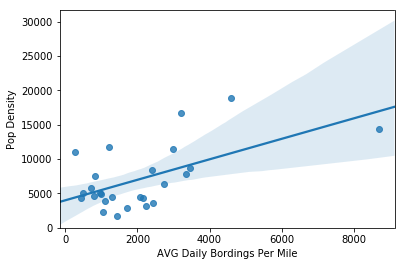

In [74]:
#visualize the correlation between AVG Daily Bordings Per Mile and Population Density

sns.regplot(x="AVG Daily Bordings Per Mile", y="Pop Density", data=df_rs)
plt.ylim(0,)

In [75]:
#### There is a positive linear correlation. Now, I am going to run a correlation command to see the strength of that correlation by isolating those two data points.

df_rs[["Pop Density", "AVG Daily Bordings Per Mile"]].corr()

,Pop Density,AVG Daily Bordings Per Mile
Pop Density,1.000000,0.581689
AVG Daily Bordings Per Mile,0.581689,1.000000


(0, 231843.7139980017)

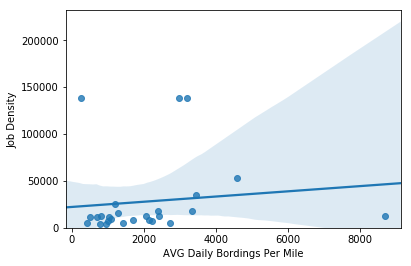

In [76]:
#visualize the correlation between AVG Daily Bordings Per Mile and Job Density

sns.regplot(x="AVG Daily Bordings Per Mile", y="Job Density", data=df_rs)
plt.ylim(0,)

In [77]:
#This mean 'Population Density' and 'Job Density' is very high. I belive this is due to several lines from the NYC area, San Francisco, and Boston being included in the dataset. Since NYC 
#and the surrounding communities are some of the most densely populated areas on the globe (as well as San Fancisco and Boston) I am going to remove them from the data set as
#outliers. This should help establish a better mean average density for smaller and less populated cities more closely reflective of the 
#nature and built environment in Atlanta. 

df_rs2 = df_rs.drop([0,1,4,5,25], axis=0)

In [78]:
#The dataframe df_rs contains all of the information from the ligh-right systems in the United States. I will now make a new dataframe of the top 10 performing systems as 
#defined by the most boardings per mile. Afterwards, I will perform a mean average analysis of the number of persons per square mile column. Set up the mean average for the 
#Pop Density
df_rs3 = df_rs2.head(10)

df_rs3

,System Name,City,Annual Ridership,Daily Ridership,AVG Daily Bordings Per Mile,Pop Density,Job Density
2,Link,Seattle,24155900,74400,3456,8642,35112
3,METRO Light Rail,Minneapolis,23811200,71900,3344,7820,17631
6,Buffalo Metro Rail,Buffalo,4560600,16900,2734,6436,4710
7,METRORail,Houston,18808000,61100,2427,3660,12556
8,Metro Rail,Los Angeles,67921600,219900,2403,8483,17386
9,Valley Metro Rail,Phoenix,16269000,48900,2240,3207,6984
10,San Diego Trolley,San Diego,37215800,112100,2140,4325,7937
11,MAX Light Rail,Portland,39173700,119700,2070,4504,12978
12,Lynx,Charlotte,5228500,16900,1708,2827,8092
13,TRAX,Salt Lake City,18823500,63000,1435,1709,5389


In [79]:
#After removing the outliers, I am goint to rerun the correlation commands on the new dataframe to determine if the Population Density and AVG Bordings Per Mile strengthens. 
df_rs3.corr()

,Annual Ridership,Daily Ridership,AVG Daily Bordings Per Mile,Pop Density,Job Density
Annual Ridership,1.000000,0.998189,0.039953,0.438033,0.308191
Daily Ridership,0.998189,1.000000,0.025802,0.436752,0.297633
AVG Daily Bordings Per Mile,0.039953,0.025802,1.000000,0.846095,0.721692
Pop Density,0.438033,0.436752,0.846095,1.000000,0.721716
Job Density,0.308191,0.297633,0.721692,0.721716,1.000000


(0, 11417.299620950962)

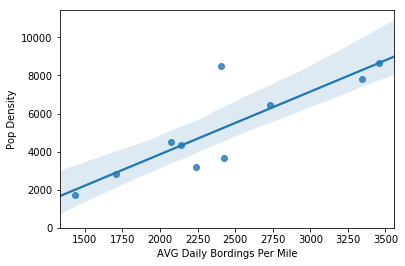

In [80]:
#visualize the correlation between AVG Daily Bordings Per Mile and Population Density. We can see that the correlation has strengthen drastically. This confirms that the removal
#of the data was the right move.

sns.regplot(x="AVG Daily Bordings Per Mile", y="Pop Density", data=df_rs3)
plt.ylim(0,)

(0, 37180.64833865247)

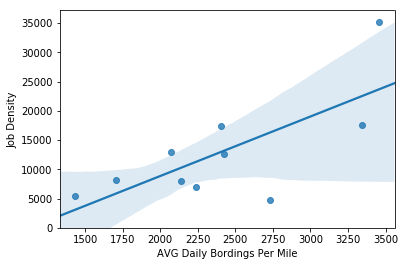

In [81]:
#visualize the correlation between AVG Daily Bordings Per Mile and Population Density. We can see that the correlation has strengthen drastically. This confirms that the removal
#of the data was the right move.

sns.regplot(x="AVG Daily Bordings Per Mile", y="Job Density", data=df_rs3)
plt.ylim(0,)

In [82]:
#P-Value probability value to further test correlation between the two variables (Pop Density and AVG Bordings Per Mile)

from scipy import stats

In [83]:
pearson_coef, p_value = stats.pearsonr(df_rs3['Pop Density'], df_rs3['AVG Daily Bordings Per Mile'])
print("The Peason Correlation Coefficient is", pearson_coef, "with P-value of P =", p_value)

The Peason Correlation Coefficient is 0.8460952200149079 with P-value of P = 0.0020297288219629623


In [84]:
pearson_coef, p_value = stats.pearsonr(df_rs3['Job Density'], df_rs3['AVG Daily Bordings Per Mile'])
print("The Peason Correlation Coefficient is", pearson_coef, "with P-value of P =", p_value)

The Peason Correlation Coefficient is 0.7216916647536081 with P-value of P = 0.018457500841782156


In [85]:
#Since the p-value is closer to < 0.001 for Pop Density than it is for Job Density, it would be advisable to steer investment toward NPUs with greater pop density. I can write with certainty that the correlation is in fact very strong.

#Perform the mean average calculation on the df3 dataframe to determine a benchmark for an analysis on Atlanta's NPU districts. This benchmark would set the standard for 
#determining which NPU Districts contain the population density needed for a successful system.
df_rs3["Pop Density"].mean()

5161.3

## Step 2: Scape and Analyze the City of Atlanta NPU Data

#### The information that is compiled on this table once again required extensive work. The format in which it was provided was inconsistent and very unclean. Furthermore, the information was spread across multiple data sources, including the United States Census Bureau, the Atlanta Regional Commission, and the City of Atlanta government. 

#### As I did before, I decided to wrangle and clean the data outside the notebook environement. I saved the formatted document in CSV UTF-8 and uploaded that documentation to the IBM Cloud by structuring a connection between my local drive and the IBM Notebook. I loaded the proper libraries for importing these documents from the IBM cloud.

In [86]:
#point my notebook toward the correct IBM Cloud bucket where I uploaded and stored the dataset. 
body = client_4cfe7dfb4a504374b8734800f9bfe390.get_object(Bucket='ibmcapstoneprojectatlantatransite-donotdelete-pr-1vuo37pk120fvz',Key='PopJobs.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

#read the dataset into a pandas formatted dataframe.
df_atl = pd.read_csv(body)
df_atl

,NPU,District,TOTAL POPULATION,2000 Pop,Pop Change,Sq Miles,POP SQ MILE,JOBS,Residential Permits,Commercial Building Permits,Single-Family,Total
0,A,NPU A,12506,11318,10.5,11.43,1094,6521,0,0,39,39
1,B,NPU B,48709,38562,26.3,10.18,4785,91833,44,4,72,120
2,C,NPU C,18226,16243,12.2,6.05,3013,6370,5,1,22,28
3,D,NPU D,11361,8576,32.5,6.49,1751,17068,30,3,27,60
4,E,NPU E,45375,34502,31.5,5.91,7678,99242,12,7,22,41
5,F,NPU F,25661,21378,20.0,6.00,4277,11200,21,3,55,79
6,G,NPU G,8266,11642,-29.0,5.62,1471,3675,32,3,1,36
7,H,NPU H,15452,17390,-11.1,6.39,2418,2424,0,0,0,0
8,I,NPU I,23650,21697,9.0,9.59,2466,3349,2,0,6,8
9,J,NPU J,10160,17009,-40.3,4.44,2288,3397,0,0,11,11


In [87]:
#Get the top five most dense districts
df_atl.sort_values(['POP SQ MILE'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top10 = df_atl.head(10)

# new dataframe
df_top10

,NPU,District,TOTAL POPULATION,2000 Pop,Pop Change,Sq Miles,POP SQ MILE,JOBS,Residential Permits,Commercial Building Permits,Single-Family,Total
12,M,NPU M,30647,21343,43.6,3.78,8108,131381,46,6,19,71
4,E,NPU E,45375,34502,31.5,5.91,7678,99242,12,7,22,41
19,T,NPU T,17260,20095,-14.1,2.74,6299,4965,2,2,0,4
21,W,NPU W,21502,20197,7.0,3.52,6108,6790,3,2,52,57
13,N,NPU N,19039,14730,29.3,3.44,5535,6426,41,3,6,50
11,L,NPU L,6970,7314,-4.7,1.32,5280,1883,0,0,7,7
20,V,NPU V,15542,15840,-1.9,3.17,4903,3790,1,0,38,39
1,B,NPU B,48709,38562,26.3,10.18,4785,91833,44,4,72,120
5,F,NPU F,25661,21378,20.0,6.00,4277,11200,21,3,55,79
10,K,NPU K,9973,11923,-16.4,2.39,4173,2478,0,0,7,7


In [88]:
#create a dataframe of the 10 most dense NPU districts. This will be used on a bar chart.

df_top10 = df_top10.drop(columns=['2000 Pop', 'Sq Miles', 'JOBS', 'Commercial Building Permits', 'Single-Family', 'Total'], axis=1)

df_top10

,NPU,District,TOTAL POPULATION,Pop Change,POP SQ MILE,Residential Permits
12,M,NPU M,30647,43.6,8108,46
4,E,NPU E,45375,31.5,7678,12
19,T,NPU T,17260,-14.1,6299,2
21,W,NPU W,21502,7.0,6108,3
13,N,NPU N,19039,29.3,5535,41
11,L,NPU L,6970,-4.7,5280,0
20,V,NPU V,15542,-1.9,4903,1
1,B,NPU B,48709,26.3,4785,44
5,F,NPU F,25661,20.0,4277,21
10,K,NPU K,9973,-16.4,4173,0


In [89]:
#The benchmark states that the most used light rail transit lines are placed in areas with a population density of 5,161 people per square mile. Using this as a benchmark, I would like to determine 
#which of the City of Atlanta's NPU Districts meet this minimal requirement. 

# Visualizing the Data via Folium and Creating a map of the city.

In [90]:
!conda install -c odm2 folium --yes
import folium

print('Folium install and imported')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.2.0               |           py36_1          37 KB  odm2
    folium-0.5.0               |           py36_0          76 KB  odm2
    ------------------------------------------------------------
                                           Total:         113 KB

The following NEW packages will be INSTALLED:

    branca: 0.2.0-py36_1 odm2
    folium: 0.5.0-py36_0 odm2


branca-0.2.0         | 37 KB     | ##################################### | 100% 
folium-0.5.0         | 76 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Folium install and imported


In [91]:
#passing in the longitude and latitude of the City of Atlanta to create a specific city map 

atlanta_location = [33.7490, -84.3880]
atlanta_map = folium.Map(location=atlanta_location, zoom_start=11, tiles='Stamen Terrain')

#display map to test the location parameters
atlanta_map

In [92]:
#This will write my stored data into a JSON file. Doing so will allow the imported NPU 
#district map JSON to interact with my NPU data.

df_atl.to_json('dfatl.json')

In [93]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [94]:
#import the libraries necessary to read the JSON NPU map, read and write the CSV file I uploaded, and create a Choropleth Map.
import folium
import urllib, json
import pandas as pd

#read the NPU JSON file from a hosted site.
url = "https://raw.githubusercontent.com/jordanstreiff/atlanta-city-council-search/master/public/NPU.geojson"
response = urllib.request.urlopen(url)
districtNPU_data = json.loads(response.read())

#load and read the data set on the NPU which includes the population and jo
csvUrl = "https://raw.githubusercontent.com/sarikard/Coursera-Capstone/master/PopJobs.csv"
csvResponse = urllib.request.urlopen(csvUrl)
districtNpuCsv =  pd.read_csv(csvResponse)

atlanta_location = [33.7490, -84.3880]
pop_map = folium.Map(location=atlanta_location, zoom_start=11, tiles='Stamen Terrain')
#generate a choropleth map using the population density information
pop_map.choropleth(
    geo_data = districtNPU_data,
    data = districtNpuCsv,
    columns = ['NPU', 'POP SQ MILE'],
    key_on = 'feature.properties.NPU',
    fill_color = 'YlGn',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name='Population Density'
)

folium.LayerControl().add_to(pop_map)

#display the map
pop_map

In [95]:
url = "https://raw.githubusercontent.com/jordanstreiff/atlanta-city-council-search/master/public/NPU.geojson"
response = urllib.request.urlopen(url)
districtNPU_data = json.loads(response.read())

atlanta_location = [33.7490, -84.3880]
popTOTAL_map = folium.Map(location=atlanta_location, zoom_start=11, tiles='Stamen Terrain')
#generate a choropleth map using the population density information
popTOTAL_map.choropleth(
    geo_data = districtNPU_data,
    data = districtNpuCsv,
    columns = ['NPU', 'TOTAL POPULATION'],
    key_on = 'feature.properties.NPU',
    fill_color = 'OrRd',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name='Total Population'
)

folium.LayerControl().add_to(popTOTAL_map)

#display the map
popTOTAL_map

In [96]:
atlanta_location = [33.7490, -84.3880]
popCHANGE_map = folium.Map(location=atlanta_location, zoom_start=11, tiles='Stamen Terrain')
#generate a choropleth map using the population density information
popCHANGE_map.choropleth(
    geo_data = districtNPU_data,
    data = districtNpuCsv,
    columns = ['NPU', 'Pop Change'],
    key_on = 'feature.properties.NPU',
    fill_color = 'PuBuGn',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name='Percent Population Change'
)

folium.LayerControl().add_to(popCHANGE_map)

#display the map
popCHANGE_map

In [97]:
atlanta_location = [33.7490, -84.3880]
resPERMITS_map = folium.Map(location=atlanta_location, zoom_start=11, tiles='Stamen Terrain')
#generate a choropleth map using the population density information
resPERMITS_map.choropleth(
    geo_data = districtNPU_data,
    data = districtNpuCsv,
    columns = ['NPU', 'Residential Permits'],
    key_on = 'feature.properties.NPU',
    fill_color = 'YlGnBu',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name='Residential Permits 2016'
)

folium.LayerControl().add_to(resPERMITS_map)

#display the map
resPERMITS_map

# Create Bar Chart Analyzing the 10 Most Dense NPU Districts

### I will create bar charts based off the dataframe I created from the top-ten most densely populated districts.

In [147]:
# let's check the column labels types now
all(isinstance(column, str) for column in df_atl.columns)

True

In [148]:
#reaccess the df_atl10 dataframe for reference in building the bar chart.

df_top10

,NPU,District,TOTAL POPULATION,Pop Change,POP SQ MILE,Residential Permits
12,M,NPU M,30647,43.6,8108,46
4,E,NPU E,45375,31.5,7678,12
19,T,NPU T,17260,-14.1,6299,2
21,W,NPU W,21502,7.0,6108,3
13,N,NPU N,19039,29.3,5535,41
11,L,NPU L,6970,-4.7,5280,0
20,V,NPU V,15542,-1.9,4903,1
1,B,NPU B,48709,26.3,4785,44
5,F,NPU F,25661,20.0,4277,21
10,K,NPU K,9973,-16.4,4173,0


In [161]:
#set up a dataframe for the creation of a barchart specific to Residential Permits.
df_popchangechart = df_top10.drop(columns=['TOTAL POPULATION', 'POP SQ MILE', 'Residential Permits',], axis=1)

df_popchangechart

,NPU,District,Pop Change
12,M,NPU M,43.6
4,E,NPU E,31.5
19,T,NPU T,-14.1
21,W,NPU W,7.0
13,N,NPU N,29.3
11,L,NPU L,-4.7
20,V,NPU V,-1.9
1,B,NPU B,26.3
5,F,NPU F,20.0
10,K,NPU K,-16.4


In [162]:
#index this dataframe on District.
df_popchangechart.set_index('District', inplace=True)

df_popchangechart

,NPU,Pop Change
District,,
NPU M,M,43.6
NPU E,E,31.5
NPU T,T,-14.1
NPU W,W,7.0
NPU N,N,29.3
NPU L,L,-4.7
NPU V,V,-1.9
NPU B,B,26.3
NPU F,F,20.0


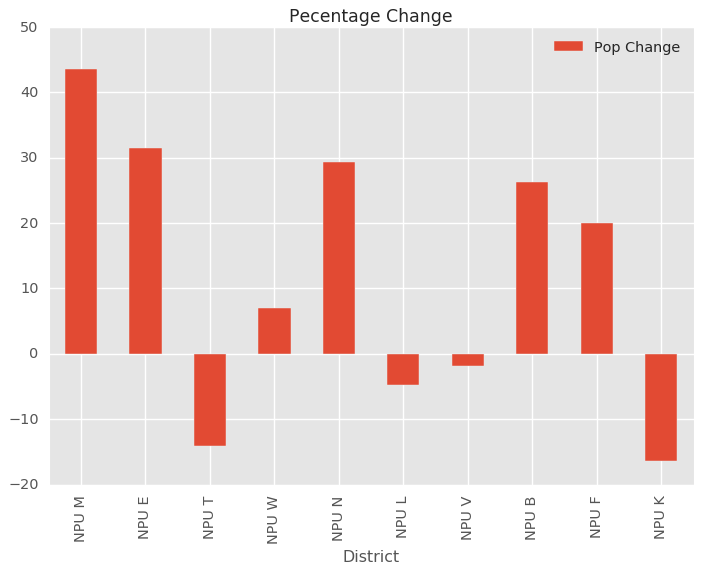

In [164]:
#chart the number of residential building permits
df_popchangechart.plot.bar()
plt.rcParams['figure.figsize'] = (20,10)
plt.title('Pecentage Change')
pl.style.use('seaborn-talk')

In [165]:
#drop unnecessary columns from data frame
df_permitchart = df_top10.drop(columns=['TOTAL POPULATION', 'Pop Change', 'POP SQ MILE'], axis=1)

df_permitchart

,NPU,District,Residential Permits
12,M,NPU M,46
4,E,NPU E,12
19,T,NPU T,2
21,W,NPU W,3
13,N,NPU N,41
11,L,NPU L,0
20,V,NPU V,1
1,B,NPU B,44
5,F,NPU F,21
10,K,NPU K,0


In [166]:
#index the chart on the District for labeling purposes
df_permitchart.set_index('District', inplace=True)

df_popchangechart

,NPU,Pop Change
District,,
NPU M,M,43.6
NPU E,E,31.5
NPU T,T,-14.1
NPU W,W,7.0
NPU N,N,29.3
NPU L,L,-4.7
NPU V,V,-1.9
NPU B,B,26.3
NPU F,F,20.0


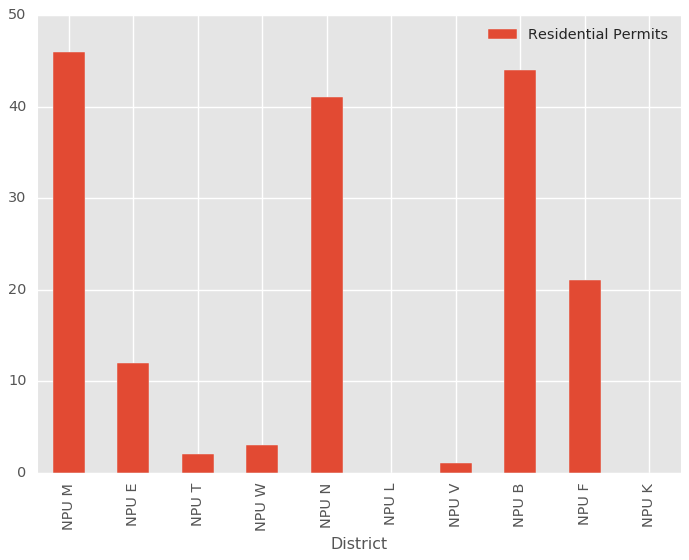

In [167]:
#chart the number of 
df_permitchart.plot.bar()
plt.rcParams['figure.figsize'] = (20,10)
pl.style.use('seaborn-talk')